<a href="https://colab.research.google.com/github/vachkim/LECTURE/blob/master/MACHINE_LEARNING/Lec_MODELING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 어제자 복습_로컬 환경에서 작업할 때
# Repo하나가 프로젝트래
# Git에서 Repo 생성 후 git clone - = 바탕화면 폴더 생성
# 로컬 환경에서 작업한 후 새로운 파일을 git add/git commit -m "message"/git push사용해서 업로드

In [ ]:
#어제자 복습_구글 코랩에서 작용할 때 주의
#구글코랩/로컬 두 군데서 작업했을 때, github에 update하려면 두 개의 파일을 동기화부터 해주자
#명령어 = git pull

In [ ]:
import numpy as np
import sklearn #sklearn = 머신러닝 전용 파이썬 패키지
from sklearn.datasets import load_iris
iris = load_iris()
iris_label = iris.target
iris_data = iris.data
import pandas as pd
from pandas import DataFrame, Series
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']

# map함수를 통해 데이터 값 변경하기
replace = {0:'setosa',1:'versicolr',2:'virginica'}
data['species'] = data['species'].map(replace)
# map이 아니라 for문 사용해도 된다
# for items in iris[target];
# if items == 0; iris[target] = 'setosa'이런 식으로 작성하면 되겠지 

# np.c_는 두 변수를 연쇄하는 함수
# np.c하기 어려울 경우
# data = pd.DataFrame(data=iris[data],columns=iris[feature_names])
# 위처럼 하고 data['target'] = iris['target']으로 데이터를 추가해도 된다

In [ ]:
#train_test_split을 활용해 데이터셋 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2, #test_size는 테스트데이터의 비율
                                                    random_state=1)

#머신러닝 모형 만들기_decision tree classifier활용
#나무모형에 대한 자세한 설명은 아래 참조
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1,max_depth=2) #여기서 max_depth를 조작해주면 2단계까지로 tree_model이 줄어든다
dt_clf.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score
pred=dt_clf.predict(X_test)
#Y테스트값을 예측하는 나무모형의 정확도 
print('the accuracy of the decision tree is : {:.3f}'.format(accuracy_score(pred,Y_test)))

the accuracy of the decision tree is : 0.967


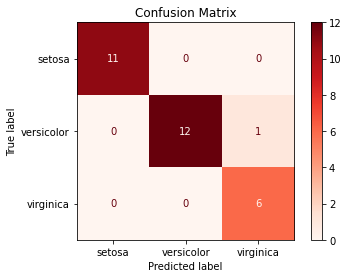

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             X_test, Y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');
#아래에서 행과 열 값이 일치하는 것은 한 종으로 정확히 분류된 것
# 1로 동떨어져 있는 것은 예측오류

### 0) 이론
- 나무모형 
 - 자체적으로 기준을 부여해서 개체를 분류하는 것 
 - 지니계수; 불순도 
 - 따라서 나무모형은 지니계수를 0으로 만드는 작업이라고 생각할 수 있다
 - 문제는 훈련 데이터를 바탕으로 가지를 내렸어도, 테스트 데이터를 분류하기 애매한 경우가 있을 수 있다
 - 또한 잔가지가 너무 많을 경우 오히려 더 복잡해지는 경우가 발생. 적정수준에서 가지를 쳐주는 것이 필요하다

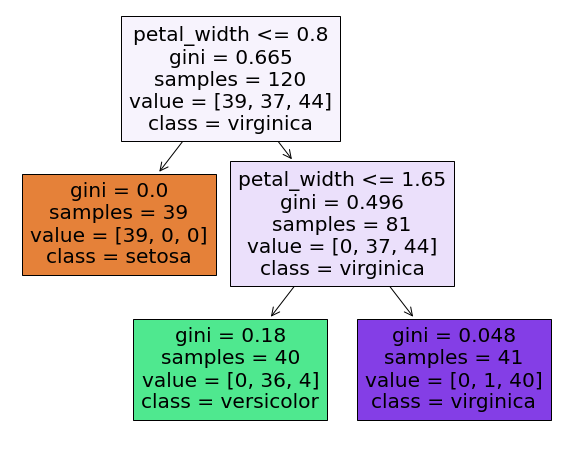

In [ ]:
import matplotlib.pyplot as plt

#explt_vars = tree모형에서 분류의 기준이 되는 독립변수
#fct_val = 그에 따라 분류되는 종속변수
explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);
#결과를 해석해보면 petal_width<=0.8을 기준으로 나눴을 때, setosa와 그 외의 것으로 나눌 수 있고 setosa는 지니계수가 0으로 완벽하게 분류됨
#but virginica, versicolor는 지니계수 0.496으로 완벽하게 분류되지 않았기 때문에 한단계 더 내려가서 분류

Text(4.05, 0.5, '(Depth=2)')

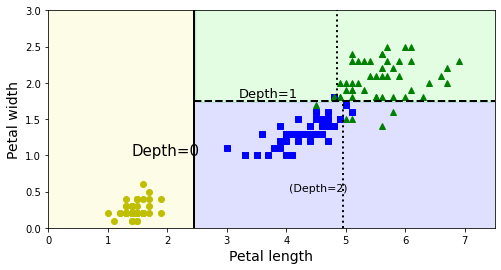

In [ ]:
#tree모형 분류과정을 시각화하기
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

In [ ]:
# decisiontree 예제
from sklearn import tree
X = [[0,0],[1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
# fit이 뭔 소리인가
# https://stackoverflow.com/questions/45704226/what-does-fit-method-in-scikit-learn-do
# fit give you a function that represents a line that is best fits all the points
# 그리고 based on this it can estimate other results
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
#predict이 뭔가
#http://scipy-lectures.org/packages/scikit-learn/index.html  _ 여기 설명 매우 simple itself
#여하튼 예측할 값을 넣는 것, float을 넣은 건 데이터가 너무 simple해서 
clf.predict([[2., 2.]])

array([1])

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

### 1) 타이타닉 자료수집
- 오픈소스 DB

 - 장점=공짜로 DB사용 가능
 - 단점=운영체제마다 다른 세팅이 필요하다 

- 클라우드 DB

 - 장점=Anywhere, 인터넷만 연결되어 있으면 접속 및 공유가 가능
 - 단점=취약한 보안

- 수업에서 쓸 DB는 빅쿼리

 - 구글 클라우드의 한부분, 마케팅에서 사용한대
 - 자체적인 분석기능이 있대



In [ ]:
#빅쿼리와 연동 및 데이터 입력
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas.io import gbq

# import sample_submission file
gender_submission = pd.read_csv('gender_submission.csv')

# Connect to Google Cloud API and Upload DataFrame
gender_submission.to_gbq(destination_table='titanic.gender_submission', 
                  project_id='leafy-loader-286903', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=qquA7Gk59gN2mGk8LCDojHvnG3Xd5E&prompt=consent&access_type=offline
Enter the authorization code: 4/3AEOEmL_EtEonXfuEpZXp0J6ewBZYpiAAAPEDFRSOd4i2BTpXhkohWI


1it [00:03,  3.65s/it]


In [ ]:
train = pd.read_csv('train.csv')
train.to_gbq(destination_table='titanic.train', 
                  project_id='leafy-loader-286903', 
                  if_exists='replace')

1it [00:03,  3.57s/it]


In [ ]:
test = pd.read_csv('test.csv')
test.to_gbq(destination_table='titanic.test', 
            project_id='leafy-loader-286903', 
            if_exists='replace')

1it [00:03,  3.64s/it]


In [ ]:
#colab과 googledrive 연결
#https://chloevan.github.io/settings/colab_drive_github_settings/
#꼬였으면 쿨하게 초기화~
from google.colab import drive
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'ml_project'

/content/drive/My Drive/Colab Notebooks/ml_project


In [ ]:
%ls

gender_submission.csv  test.csv  train.csv


In [ ]:
# 구글 인증 라이브러리
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# 빅쿼리 관련 라이브러리
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

Authenticated


In [ ]:
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'leafy-loader-286903'
client = bigquery.Client(project=project_id)

df_train = client.query('''
  SELECT 
      * 
  FROM `leafy-loader-286903.titanic.train`
  ''').to_dataframe()

df_train.shape

(891, 12)

In [ ]:
df_test = client.query('''
  SELECT 
      * 
  FROM `leafy-loader-286903.titanic_classification.test`
  ''').to_dataframe()

df_test.shape

(418, 11)

In [ ]:
pd.options.display.max_columns = None 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,None,S
1,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
2,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,None,S
3,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,None,S
4,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,None,S


### 2) 결측치 처리
- sklearn은 결측치를 허용하지 않는다
- 결측치 정도에 따라
 
 - 70%이상을 넘어갈 경우에는 삭제를 고려
 - 5%미만이면 수치형 데이터의 경우에는 평균값/범주형 데이터의 경우에는 최빈값
 - 20%~70%는 정답이 없대

In [ ]:
# data set의 Percent 구하는 함수를 짜보자. 
def check_fill_na(data):
  new_df = data.copy()
  new_df_na = (new_df.isnull().sum() / len(new_df)) * 100
  new_df_na.sort_values(ascending=False).reset_index(drop=True)
  new_df_na = new_df_na.drop(new_df_na[new_df_na == 0].index).sort_values(ascending=False)
  return new_df_na

check_fill_na(df_train)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

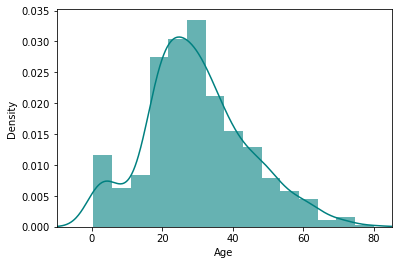

In [ ]:
import matplotlib.pyplot as plt

ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


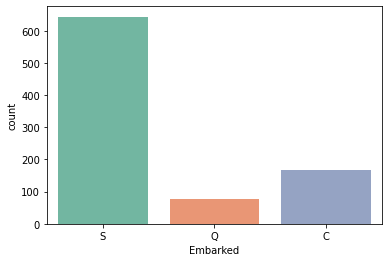

In [ ]:
import seaborn as sns
print(df_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df_train, palette='Set2')
plt.show()

In [ ]:
train_data = df_train.copy()
train_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
check_fill_na(train_data)

Series([], dtype: float64)

### 3) 도출변수
- 도출변수는 도메인에서 나온다

 - 도메인 = 업종에 대한 지식
 - 도출변수; 변수 간의 조합을 통해 또다른 유의미한 변수를 만드는 것
 - 2개의 변수를 하나로 통합할 수 있다면 연산속도가 그만큼 높아지는 것

In [ ]:
## Create categorical variable for traveling alone
import numpy as np
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

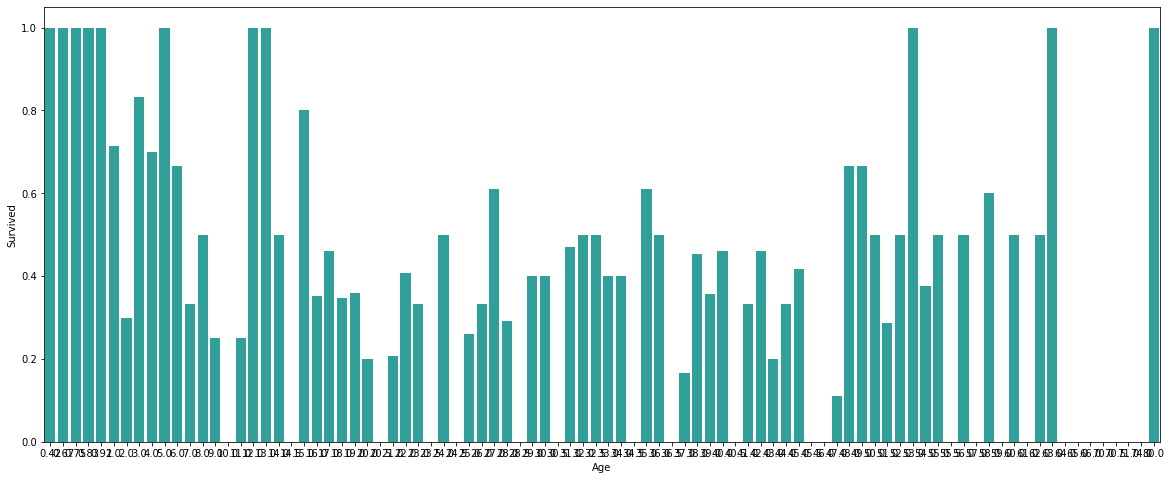

In [ ]:
plt.figure(figsize=(20,8))
avg_survival_byage = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [ ]:
train_data['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

### 4)원핫인코딩
- 라벨 인코딩

 - 주대상 = categorical data를 수치형으로 전환
 - B/C 머신러닝 알고리즘은 결국 수식이기 때문이지
 - 범주형 데이터는 숫자로 변환해도 수치적 의미를 가지면 안되지 
 - 따라서 수식에 기반한 알고리즘을 짤 수 없다 _ 비선형 모델을 사용해야 해

- 원핫 인코딩

 - 원핫 인코딩은 선형모형을 사용하기 어렵다는 라벨 인코딩의 한계를 극복한거래
 - 행과 열을 category로 해서 매칭되는거는 1, 아닌거는 0으로 표시
 - 선형모델을 사용할 수 있으나, 데이터의 크기가 커진다


In [ ]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int64  
 4   IsMinor      891 non-null    int64  
 5   Pclass_1     891 non-null    uint8  
 6   Pclass_2     891 non-null    uint8  
 7   Pclass_3     891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB


In [ ]:
test_data = df_test.copy()
test_data["Age"].fillna(df_test["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(df_test["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

test_data['IsMinor']=np.where(test_data['Age']<=16, 1, 0)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Fare         418 non-null    float64
 2   TravelAlone  418 non-null    int64  
 3   IsMinor      418 non-null    int64  
 4   Pclass_1     418 non-null    uint8  
 5   Pclass_2     418 non-null    uint8  
 6   Pclass_3     418 non-null    uint8  
 7   Embarked_C   418 non-null    uint8  
 8   Embarked_Q   418 non-null    uint8  
 9   Embarked_S   418 non-null    uint8  
 10  Sex_male     418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 16.0 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
model = LogisticRegression()
rfe = RFE(model, 8) # 변수 8개만 선택
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


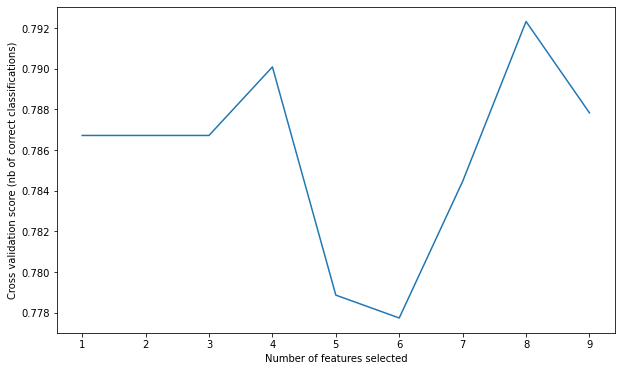

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']

### 5) 혼동행렬(Confusion Matrix)
- 지도학습 = 분류모형 평가

 - 예측값과 실제값을 행렬로 나타낸 것
 - 정분류율 = 제대로 예측한 값/전체 예측 값 = TP+TN/TP+FP+TN+FN
 - 민감도 = TP/TP+FN
 - 특이도 = TN/TN+FN
 - cut-off는 민감도와 특이도 부분의 교차점, 보통 0.5
 - 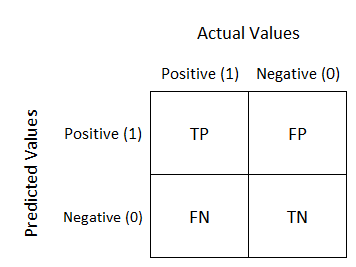
 - 이렇게 만들어 낸 ROC커브(모형의 성능)는 최소 0.5이상이어야한다

Train/Test split results:
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.460
LogisticRegression auc is 0.852


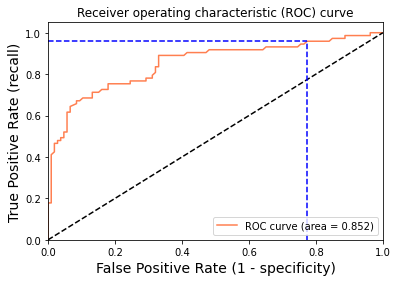

Using a threshold of 0.086 guarantees a sensitivity of 0.959 and a specificity of 0.226, i.e. a false positive rate of 77.36%.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# 데이터 셋 분리 
X = final_train[Selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 로지스틱 회귀모형
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # threshold 

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
final_test['Survived'] = logreg.predict(final_test[Selected_features])
final_test['PassengerId'] = df_test['PassengerId']
submission = final_test[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
print(submission.tail())

     PassengerId  Survived
413         1043         0
414         1101         0
415         1157         0
416         1187         0
417         1226         0
